In [1]:
from matplotlib import pyplot as plt
import numpy as np

import radial.trajectory as trajectory

2D golden angle radial trajectory: float32, (800, 256, 2)


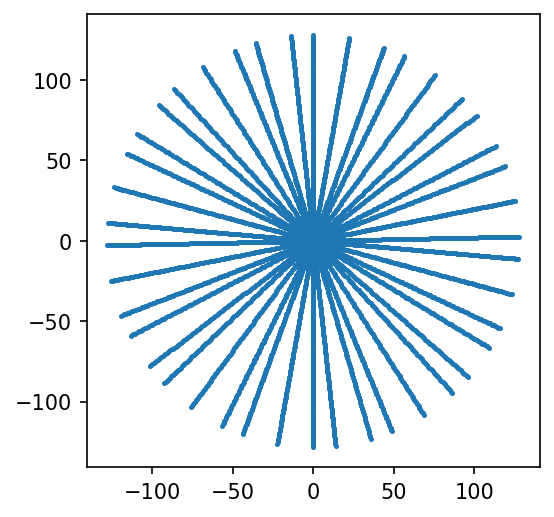

In [2]:
# Calculate trajectory and check it
nx = 256
na = 800
traj = trajectory.ga_radial_2d(nx, na)
print(f'2D golden angle radial trajectory: {traj.dtype}, {traj.shape}')

first_line = 0
num_lines = 21
slc = slice(first_line, first_line + num_lines)
f = plt.figure(dpi=150)
ax = f.subplots()
ax.scatter(traj[slc, :, 0], traj[slc, :, 1], marker='.', s=8)
ax.set_aspect('equal')

In [3]:
# Define a function for calculating trajectory and the corresponding DCF, and plotting it
def experiment(nx, na, clim=None):
    traj = trajectory.ga_radial_2d(nx, na)

    # DCF estimation (2D histogram binning method)
    histogram, xedges, yedges = np.histogram2d(traj[:, :, 0].ravel(), traj[:, :, 1].ravel(), bins=nx)
    dcf = 1 / histogram
    dcf[np.isinf(dcf)] = 0

    f = plt.figure(dpi=150)
    ax = f.subplots()
    im = ax.imshow(dcf, clim=clim)
    ax.set_title(f'DCF for a trajectory with {na} spokes')
    f.colorbar(im)


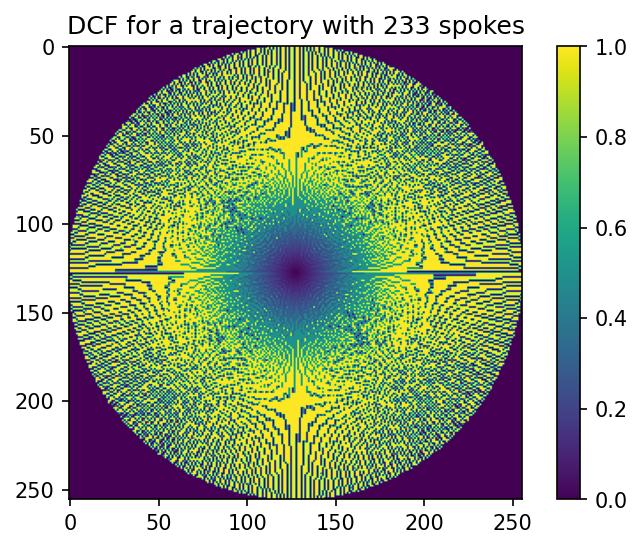

In [4]:
experiment(nx=256, na=233)

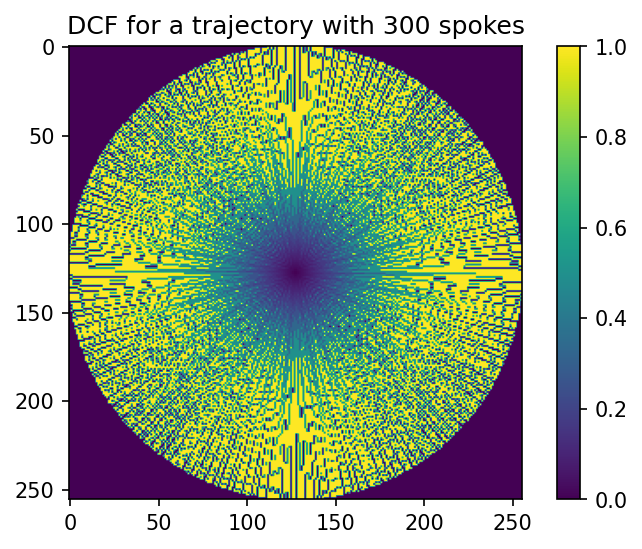

In [5]:
experiment(nx=256, na=300)

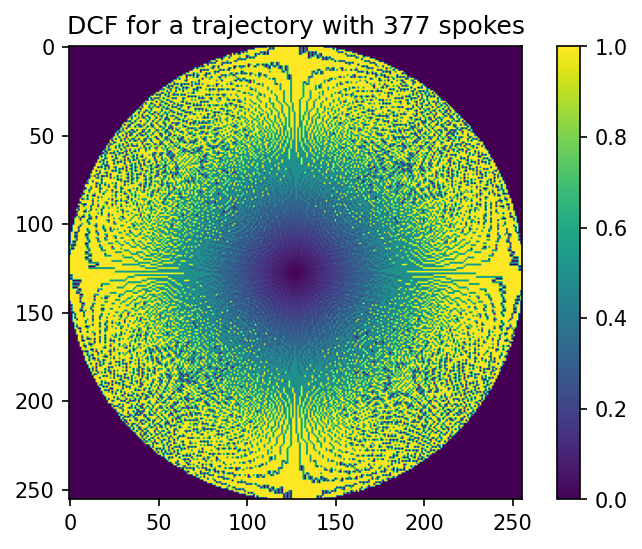

In [6]:
experiment(nx=256, na=377)

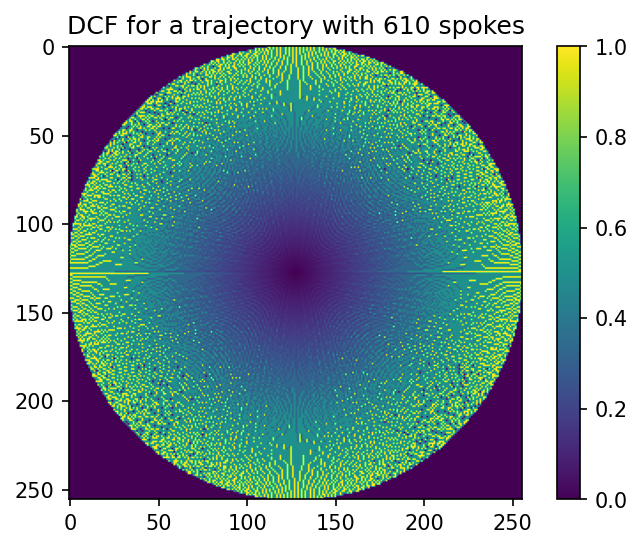

In [7]:
experiment(nx=256, na=610)

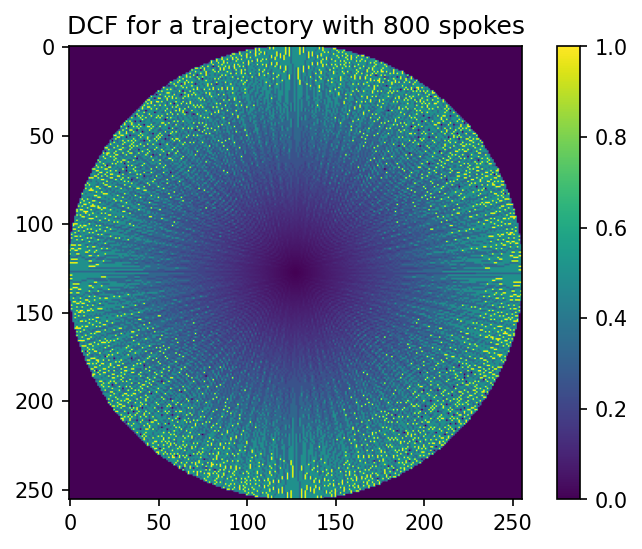

In [8]:
experiment(nx=256, na=800)

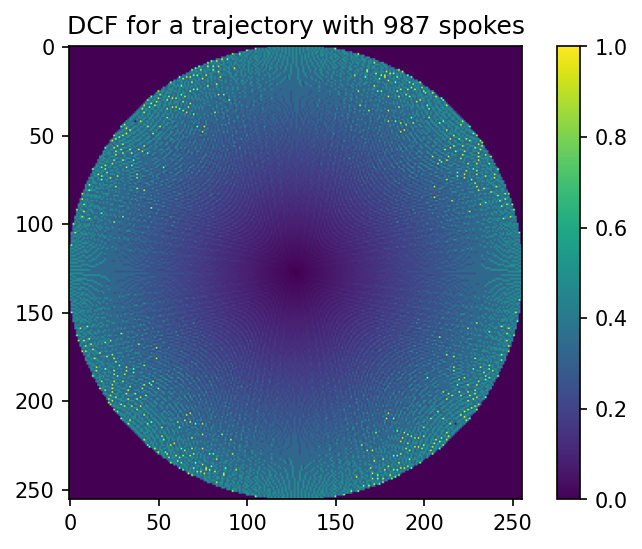

In [9]:
experiment(nx=256, na=987)

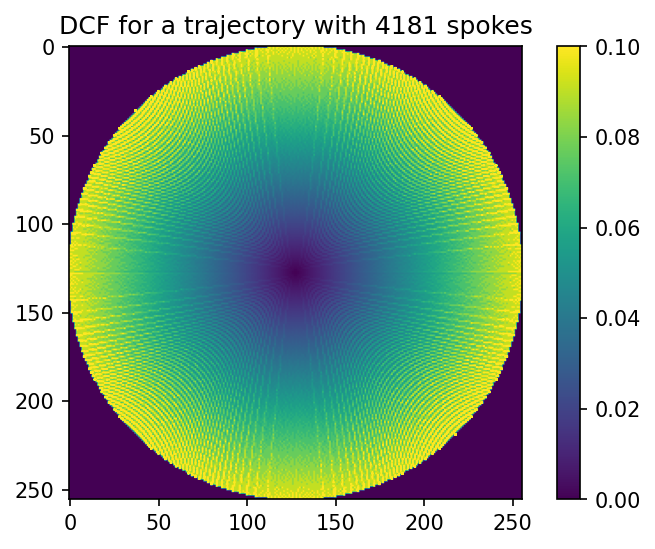

In [10]:
experiment(nx=256, na=4181, clim=(0, 0.1))

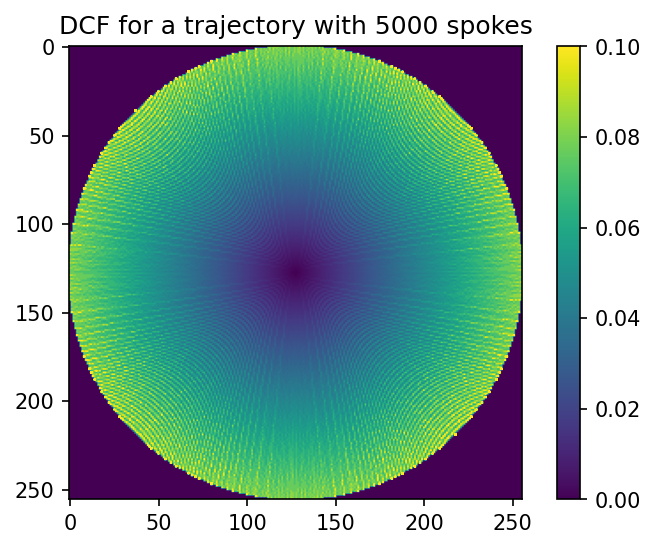

In [11]:
experiment(nx=256, na=5000, clim=(0, 0.1))

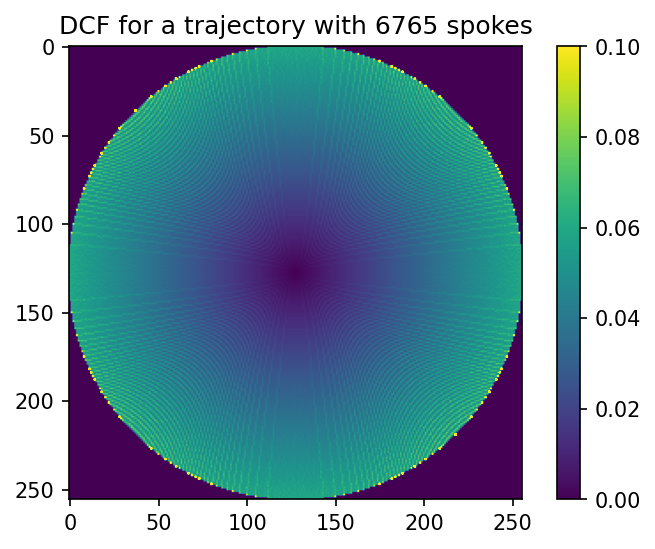

In [12]:
experiment(nx=256, na=6765, clim=(0, 0.1))